# Wine Classification Problem [accuracy :: 0.8875]

## 1.Packages

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification



## 2 - Dataset 

In [3]:
df=pd.read_csv('/home/dion/Desktop/winequality.csv')

df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.0

## 3.Visualize the data:

Text(0,0.5,'Number of bottles')

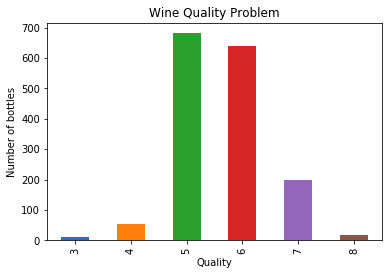

In [18]:
plt = df.quality.value_counts().sort_index().plot('bar',title='Wine Quality Problem')
plt.set_xlabel('Quality')
plt.set_ylabel('Number of bottles')

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/lib/python3/dist-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/lib/python3/dist-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


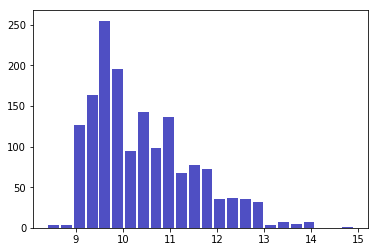

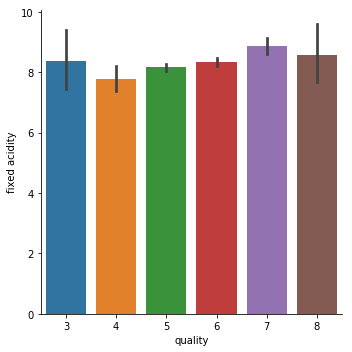

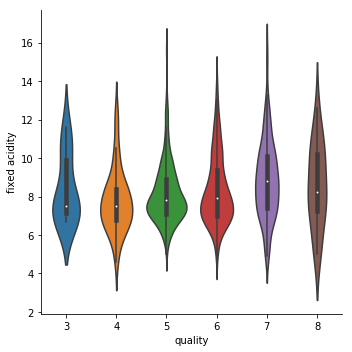

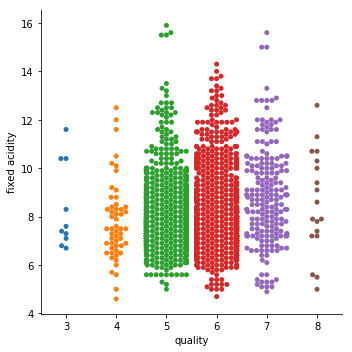

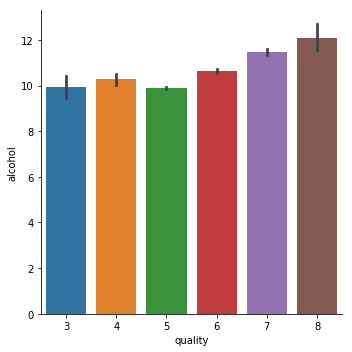

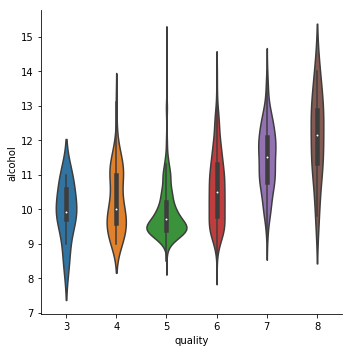

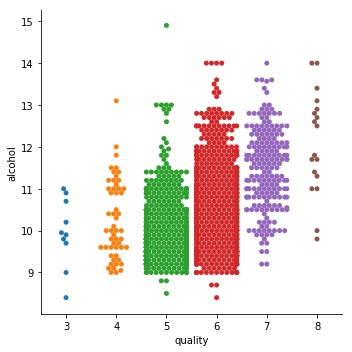

In [5]:
column_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

n, bins, patches = plt.hist(x=df['alcohol'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

plot('fixed acidity','quality')

plot('alcohol','quality')



## 4. Cleaning Data

#### 4.1 Check for NA



In [19]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


#### 4.2 Check for outliers

## 5. Dimensionality Reduction

### 5.1 Correlation between features

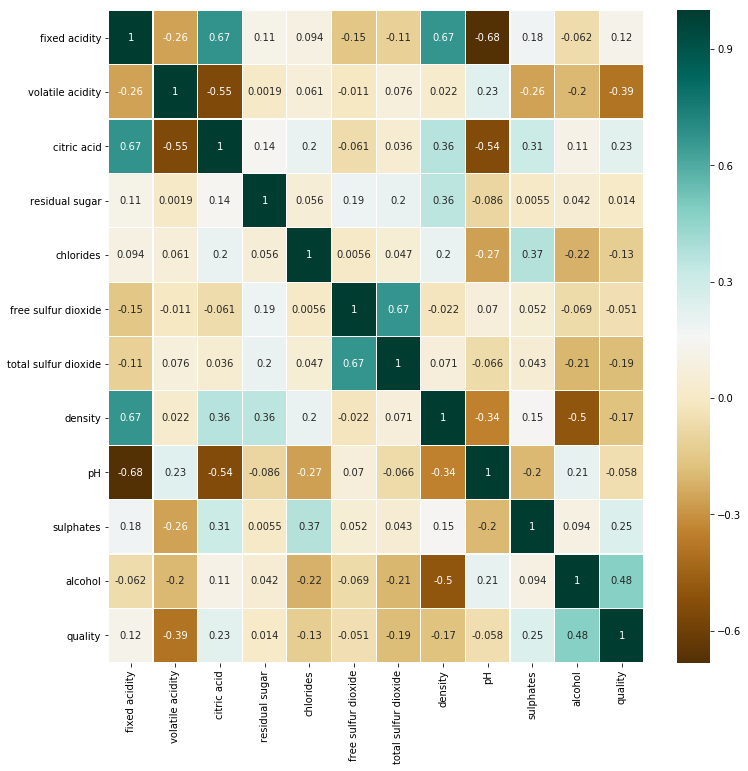

In [20]:
corr_matrix = df.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

## 6.Split Data

In [6]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

x_train.shape,x_test.shape


((1199, 11), (400, 11))

## Bad becomes 0 and good becomes 1 

In [7]:
bins = (2, 6.5, 8),
group_names = ['bad', 'good'],
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names),

label_quality = LabelEncoder(),

#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

## 8.Model Training

In [8]:
model=LinearSVC()
model.fit(x_train,y_train)
model.score(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)


0.5275

In [9]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)


/home/dion/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [ ]:
clf.best_score_